In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz 

In [4]:
loans = pd.read_csv('loans.csv')
loans = loans.drop(['id'], axis = 1)
loans.head()

,creditpolicy,loanamnt,term,intrate,installment,grade,emplength,homeownership,annualinc,verificationstatus,targetloanstatus,purpose,dti,delinq2yrs,inqlast6mths,openacc,revolbal,revolutil,totalacc
0,1,5000,36 months,0.1065,162.87,B,10+ years,RENT,24000.0,Verified,0,credit_card,27.65,0.0,1.0,3.0,13648,0.837,9.0
1,1,2500,60 months,0.1527,59.83,C,< 1 year,RENT,30000.0,Source Verified,1,car,1.00,0.0,5.0,3.0,1687,0.094,4.0
2,1,2400,36 months,0.1596,84.33,C,10+ years,RENT,12252.0,Not Verified,0,small_business,8.72,0.0,2.0,2.0,2956,0.985,10.0
3,1,10000,36 months,0.1349,339.31,C,10+ years,RENT,49200.0,Source Verified,0,other,20.00,0.0,1.0,10.0,5598,0.210,37.0
4,1,3000,60 months,0.1269,67.79,B,1 year,RENT,80000.0,Source Verified,0,other,17.94,0.0,0.0,15.0,27783,0.539,38.0


In [5]:
loans_dropna = loans.dropna(subset = ['emplength','annualinc','delinq2yrs','inqlast6mths','openacc','revolutil','totalacc'])
loans_dropna.isnull().sum()

creditpolicy          0
loanamnt              0
term                  0
intrate               0
installment           0
grade                 0
emplength             0
homeownership         0
annualinc             0
verificationstatus    0
targetloanstatus      0
purpose               0
dti                   0
delinq2yrs            0
inqlast6mths          0
openacc               0
revolbal              0
revolutil             0
totalacc              0
dtype: int64

In [6]:
loans_dropna = loans_dropna.astype({"creditpolicy":'object'})

In [7]:
print("Dataset Lenght: ", len(loans_dropna))
print("Dataset Shape: ", loans_dropna.shape)

Dataset Lenght:  41336
Dataset Shape:  (41336, 19)


In [8]:
loans_final = pd.get_dummies(loans_dropna, prefix = ['creditpolicy', 'term', 'grade', 'emplength', 
                   'homeownership', 'purpose', 'verificationstatus'], 
                         columns = ['creditpolicy', 'term', 'grade', 'emplength', 
                   'homeownership', 'purpose', 'verificationstatus'],
                            drop_first = 'TRUE')
loans_final.columns

Index(['loanamnt', 'intrate', 'installment', 'annualinc', 'targetloanstatus',
       'dti', 'delinq2yrs', 'inqlast6mths', 'openacc', 'revolbal', 'revolutil',
       'totalacc', 'creditpolicy_1', 'term_ 60 months', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'emplength_10+ years',
       'emplength_2 years', 'emplength_3 years', 'emplength_4 years',
       'emplength_5 years', 'emplength_6 years', 'emplength_7 years',
       'emplength_8 years', 'emplength_9 years', 'emplength_< 1 year',
       'homeownership_NONE', 'homeownership_OTHER', 'homeownership_OWN',
       'homeownership_RENT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding',
       'verificationstatus_Source Verified', 've

In [9]:
x_train, x_test, y_train, y_test = train_test_split(loans_final.drop(['targetloanstatus'], axis = 1), 
                                                    loans_final['targetloanstatus'], test_size=0.30, random_state=0)

In [10]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, 
                                  min_samples_split = 10, min_samples_leaf=10)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [11]:
tree.plot_tree(clf_gini.fit(x_train, y_train)) 

[Text(246.64934109431425, 363.63870967741934, 'X[1] <= 0.114\nentropy = 0.253\nsamples = 28935\nvalue = [24629, 4306]'),
 Text(82.18160060827324, 351.71612903225804, 'X[1] <= 0.084\nentropy = 0.149\nsamples = 12260\nvalue = [11269, 991]'),
 Text(36.405521576829074, 339.79354838709673, 'X[3] <= 59964.0\nentropy = 0.099\nsamples = 5621\nvalue = [5328, 293]'),
 Text(25.898481292785835, 327.87096774193543, 'X[9] <= 0.514\nentropy = 0.139\nsamples = 2824\nvalue = [2612, 212]'),
 Text(20.917960627910652, 315.9483870967742, 'X[4] <= 25.44\nentropy = 0.119\nsamples = 2362\nvalue = [2212, 150]'),
 Text(16.360744640750962, 304.0258064516129, 'X[10] <= 49.5\nentropy = 0.113\nsamples = 2286\nvalue = [2149, 137]'),
 Text(12.957721817584902, 292.1032258064516, 'X[3] <= 14600.0\nentropy = 0.109\nsamples = 2256\nvalue = [2125, 131]'),
 Text(7.30963874466507, 280.1806451612903, 'X[9] <= 0.075\nentropy = 0.289\nsamples = 40\nvalue = [33, 7]'),
 Text(6.923651220194307, 268.258064516129, 'entropy = 0.473\

In [12]:
import os
os.environ["PATH"] += os.pathsep + 'C:/unzipped/graphviz-2.38/release/bin'
tree_data_gini = tree.export_graphviz(clf_gini, out_file=None) 
graph_gini = graphviz.Source(tree_data_gini)
graph_gini

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [13]:
y_pred_gini = clf_gini.predict(x_test)
print("Accuracy is ", accuracy_score(y_test,y_pred_gini)*100)

Accuracy is  80.63059430691072


In [89]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

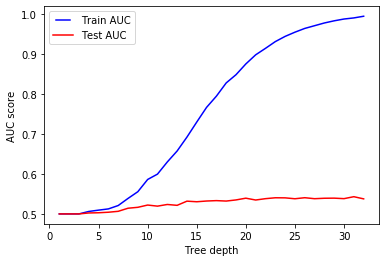

In [104]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

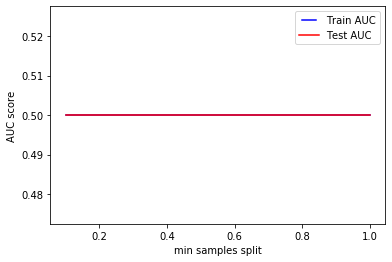

In [105]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

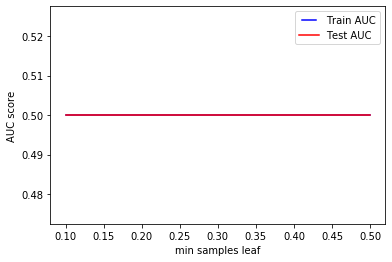

In [126]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

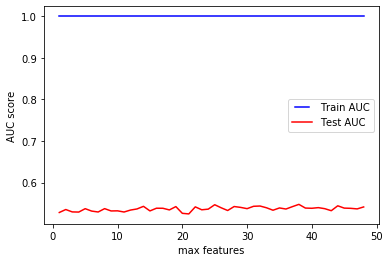

In [132]:
max_features = list(range(1,loans_final.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [136]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                                    max_depth = 4, max_features = "log2")
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

[Text(165.3075, 199.32, 'X[1] <= 0.112\nentropy = 0.607\nsamples = 28935\nvalue = [24629, 4306]'),
 Text(85.095, 163.07999999999998, 'X[1] <= 0.082\nentropy = 0.4\nsamples = 11941\nvalue = [10994, 947]'),
 Text(44.64, 126.83999999999999, 'X[3] <= 61550.0\nentropy = 0.294\nsamples = 5569\nvalue = [5280, 289]'),
 Text(22.32, 90.6, 'X[9] <= 0.277\nentropy = 0.376\nsamples = 3049\nvalue = [2827, 222]'),
 Text(11.16, 54.359999999999985, 'X[6] <= 2.5\nentropy = 0.287\nsamples = 1673\nvalue = [1589, 84]'),
 Text(5.58, 18.119999999999976, 'entropy = 0.26\nsamples = 1551\nvalue = [1483, 68]'),
 Text(16.740000000000002, 18.119999999999976, 'entropy = 0.561\nsamples = 122\nvalue = [106, 16]'),
 Text(33.480000000000004, 54.359999999999985, 'X[40] <= 0.5\nentropy = 0.47\nsamples = 1376\nvalue = [1238, 138]'),
 Text(27.9, 18.119999999999976, 'entropy = 0.457\nsamples = 1360\nvalue = [1229, 131]'),
 Text(39.06, 18.119999999999976, 'entropy = 0.989\nsamples = 16\nvalue = [9, 7]'),
 Text(66.96000000000

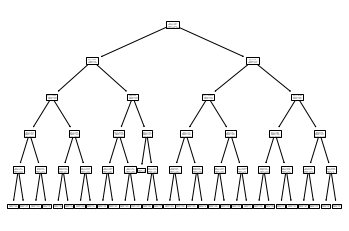

In [65]:
tree.plot_tree(clf_entropy.fit(x_train, y_train))

In [56]:
tree_data_entropy = tree.export_graphviz(clf_entropy, out_file=None) 
graph_entropy = graphviz.Source(tree_data_entropy)
graph_entropy

In [137]:
y_pred_entropy = clf_entropy.predict(x_test)
print("Accuracy is ", accuracy_score(y_test,y_pred_entropy)*100)

Accuracy is  85.00927344568986


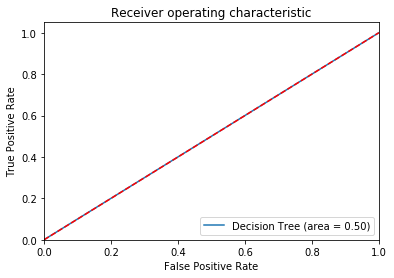

In [138]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
DT_roc_auc = roc_auc_score(y_test, y_pred_entropy)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_entropy)
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, label='Decision Tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [19]:
ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"

SyntaxError: invalid syntax (<ipython-input-19-741fef1358d0>, line 1)

In [20]:
brew install graphviz

SyntaxError: invalid syntax (<ipython-input-20-fdad2a31faa2>, line 1)